<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2 </b>
    
Thank you for your diligence! I've left a couple of new comments with digit 2, but there's nothing that needs to be fixed.
    
    
You did a fantastic job here. You have correctly split the data, explored the distributions, trained several models, and applied the bootstrapping technique. You have successfully estimated profit and conducted risk analysis. You have also compared regions based on risk-adjusted return to make recommendations for further development. Excellent job! 
    
    
I do not have any questions, so the project can be accepted. The next sprints will cover more advanced machine learning methods, I hope you will like it. Good luck! 
    
    

</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Olivia! My name is Svetlana (https://hub.tripleten.com/u/6dee602c).  Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:


<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- You have successfully explored the regions;
    
        
    
- Used linear regression to make predictions;
    
    
- Calculated profit and estimated risk values; 
    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. There's only one tiny issue. Please take a look :) 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much for submitting the project! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

## **Project Overview:**

OilyGiant is planning to develop a **new oil well site** and must decide which of **three potential regions** will deliver the **highest profit with acceptable risk**. We are tasked with building a machine learning model to predict oil reserves, calculate potential profits, and use statistical analysis to minimize decision risk. This approach ensures our recommendation is not based on a single lucky sample but on robust, repeatable outcomes. While we aim to minimize risk through rigorous analysis, inherent uncertainties in geological exploration mean that no prediction can be 100% certain.

To achieve this, we train and evaluate a Linear Regression model for each region using historical geological survey data. We then apply **bootstrapping** to simulate many possible combinations of well selections, allowing us to measure both the average profit and the likelihood of losses. Our final recommendation will prioritize **regions with the highest profit** and a **loss risk below** the company’s threshold of **2.5%**.

#### **1. Business Conditions**
**Exploration data from three regions (geo_data_0, geo_data_1, geo_data_2)**

- **Each dataset contains:**

    - Unique well ID

    - Three geological features (f0, f1, f2) used for prediction

    - Target: product (oil reserves in thousand barrels)

- **Budget: $100 million**

    - Cost to develop a **single well**: **$0.5 million**

    - **Wells surveyed:** 500 potential well locations per region (from which 200 will be selected for development)

    - **Wells selected for development:** Top **200** predicted reserves

    - **Revenue per barrel: $4,500** (product in thousand barrels × 4.5 USD × 1000)

    - **Risk threshold: 2.5% probability of loss** (97.5% confidence of profit)

    - Only **Linear Regression** allowed for model training

    - **Bootstrapping simulations**: **1,000 iterations per region**

#### **2. Step-by-Step Methodology**
**Data Preparation**

- Load datasets for all three regions and preview data

- Inspect for missing values and inconsistencies

- Separate features (f0, f1, f2) and target (product)

**Model Training & Evaluation**

- Train-test split at 75% training / 25% validation

- Train Linear Regression model on training set

- Predict reserves for validation set

- Store predictions and actual values

- Calculate average predicted reserves and RMSE per region

**Profit Threshold Calculation**

- Determine minimum reserves per well needed to avoid loss

- Compare this to each region’s average reserves

**Profit Simulation via Bootstrapping**

- From validation predictions, repeatedly select the top 200 predicted wells out of 500

- Calculate total profit for each sample

- Run 1,000 simulations to get a distribution of profits

- Calculate:

    - Mean profit

    - 95% confidence interval

    - Loss probability (% of simulations with negative profit)

**Region Selection**

- Filter regions with loss probability ≤ 2.5%

- Select region with highest mean profit

#### **3. Bootstrapping: Why It Matters**
Bootstrapping lets us simulate many possible drilling outcomes without collecting new data. For example, Region A might look highly profitable if we happen to pick a great set of 200 wells — but in reality, a different set might perform worse. By running 1,000 bootstrap samples, we see the full range of possible profits, including worst-case scenarios. This protects OilyGiant from making a decision based on a single lucky selection and ensures consistent profitability across multiple possible development plans.

## **1. Load Libraries & Define Constants**

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define Constants for project
PRICE_PER_UNIT = 4_500           # $ per unit (1 unit = 1,000 barrels)
N_WELLS_TO_DEVELOP = 200         # number of wells to develop (k)
SAMPLE_SIZE = 500                # wells studied per campaign before selecting top-k
BUDGET_USD = 100_000_000         # total budget
N_BOOT = 1_000                   # bootstrap iterations
LOSS_RISK_THRESHOLD = 2.5        # %
RNG = np.random.RandomState(12345)

print(
    f"PRICE_PER_UNIT: ${PRICE_PER_UNIT:,}\n"
    f"N_WELLS_TO_DEVELOP: {N_WELLS_TO_DEVELOP}\n"
    f"SAMPLE_SIZE: {SAMPLE_SIZE}\n"
    f"BUDGET_USD: ${BUDGET_USD:,}\n"
    f"N_BOOT: {N_BOOT}\n"
    f"LOSS_RISK_THRESHOLD: {LOSS_RISK_THRESHOLD}%"
)


PRICE_PER_UNIT: $4,500
N_WELLS_TO_DEVELOP: 200
SAMPLE_SIZE: 500
BUDGET_USD: $100,000,000
N_BOOT: 1000
LOSS_RISK_THRESHOLD: 2.5%


## **2. Download & Prepare Data**

#### <u>**Steps to Take**</u>

1. **Load datasets** for all three regions (geo_data_0, geo_data_1, geo_data_2) and preview data using `.head()` and `.info()` to understand the data structure and types.

2. **Preview data** using:
    - .head() to view the first 5 rows

    - .info() to inspect column names, types, and non-null counts

    - .shape to see the number of rows and columns

3. **Inspect for missing values** using .isnull().sum().
    - If missing values are present, decide whether to remove them or fill them with a reasonable value (e.g., median), depending on the extent and nature of the missing data.

4. **Verify data types** using .dtypes to ensure numerical features are correctly represented.
    - Convert data types if needed (e.g., to float64 for numeric processing).

5. **Analyze the distribution of features and the target variable** using .describe() and visualizations (histograms, boxplots) to understand ranges and identify potential extreme values.

6. **Handle extreme outliers** based on business logic and domain knowledge:
    - First, confirm whether extreme values are legitimate production levels or data errors.

    - If they are **errors or unrealistic**, remove them using conditional filtering.

    - If they are **legitimate high values**, keep them in the dataset but be aware of their impact on the model.

7. **Check for potential target leakage** by calculating the correlation between each feature (f0, f1, f2) and the target (product).
    - Very high correlations might indicate leakage, which should be investigated.

8. **Analyze the target variable distribution** (product) for each region using histograms to understand oil reserve patterns and business implications.

9. **Separate features and target** for each region:
    - Features: f0, f1, f2

    - Target: product

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good introduction that reflects the main goal of the project, well done!     
</div>

### **Load and Preview Data:**

In [3]:
# Load Data

df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Create dictionary for looping
dataframes = {'df_0': df_0, 'df_1': df_1, 'df_2': df_2}

# Preview first few rows and data info
for name, df in dataframes.items():
    print("\n" + "="*50)
    print(f"{name} - First 5 Rows")
    print("="*50)
    display(df.head())   
    
    print("\n" + "-"*50)
    print(f"{name} - Info")
    print("-"*50)
    df.info() 


df_0 - First 5 Rows


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



--------------------------------------------------
df_0 - Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

df_1 - First 5 Rows


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



--------------------------------------------------
df_1 - Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

df_2 - First 5 Rows


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



--------------------------------------------------
df_2 - Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

With dataframes, `display` produces better outputs than `print`.
    
</div>

### **Inspect for Missing Values:**

In [4]:
# Check for missing values
for name, df in dataframes.items():
    print(f"{name} missing values:\n{df.isnull().sum()}\n")

df_0 missing values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

df_1 missing values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

df_2 missing values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64



### **Verify Data Types:**

In [5]:
# Check data types
for name, df in dataframes.items():
    print(f"{name} data types:\n{df.dtypes}\n")

df_0 data types:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

df_1 data types:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

df_2 data types:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object



#### **Observations:**
- Each dataset contains 100,000 rows × 5 columns:  
  - `id` (string): unique well identifier.  
  - `f0`, `f1`, `f2` (float): geological exploration features.  
  - `product` (float): oil reserve volume in thousand barrels.  
- No missing values detected.
    - Verified data types: id is object, all features and target (product) are float64, consistent across all datasets.
- Data types are appropriate: numeric features are floats, `id` is object type.
- Memory usage per dataset: ~3.8 MB, which is manageable.

### **Summary Statistics & Outlier Check:**

In [6]:
# Summary statistics
for name, df in dataframes.items():
    print(f"{name} - Summary Statistics:")
    print(df.describe(), "\n")

df_0 - Summary Statistics:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347 

df_1 - Summary Statistics:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551

#### **Observations:**

<u>**Region 0**</u>
- **Central Tendency:**
    - **Mean** product: **92.50k barrels**

    - Median is very close to the mean, suggesting a relatively **symmetric distribution**.

- **Spread:**
    - Std. deviation: **44.29**, indicating moderate variability.

- **Outliers:**
    - f2 ranges from **-12.09 to 16.00**, which is much wider than the interquartile range — likely contains extreme outliers.

    - Product min is **0**, which could indicate wells with **no reserves**.

- **Implication:**
    - **Outliers in f2 could impact model** coefficients for Linear Regression.

<u>**Region 1**</u>
- **Central Tendency:**
    - **Mean** product: **68.83k barrels** (lower than Regions 0 and 2).

    - Median (57.09) is notably lower than the mean — suggests **right-skew** (some very high reserve wells).

- **Spread:**
    - f0 has extremely high variance **(std = 8.97)** and extreme values **(min = -31.61, max = 29.42)**.

    - f1 also has a very wide range **(-26.36 to 18.73)**.

- **Outliers:**
    - **Multiple extreme outliers in f0 and f1**, far beyond typical geological variation.

- **Implication:**
    - This region’s features may need **scaling or outlier handling** before modeling to avoid distorted predictions.

<u>**Region 2**</u>
- **Central Tendency:**
   - **Mean** product: **95.00k barrels (highest average reserves)**.

    - Median **(94.93)** is almost identical to mean — indicates **balanced distribution**.

- **Spread:**
   - Std. deviation similar to Region 0 for product **(~44.75)**.

- **Outliers:**
    - f0 **min of -8.76 and max of 7.24** suggests **fewer extreme outliers** compared to Region 1.

    - f2 has a wide range **(-11.97 to 16.74)**, but distribution may still be manageable.

- **Implication:**
    - More stable feature ranges may lead to **more reliable model training** without heavy preprocessing.

### **Check for Potential Target Leakage:**

In [7]:
# Correlation with target variable
for name, df in dataframes.items():
    print(f"{name} - Correlation with product:")
    print(df[['f0', 'f1', 'f2', 'product']].corr()['product'], "\n")

df_0 - Correlation with product:
f0         0.143536
f1        -0.192356
f2         0.483663
product    1.000000
Name: product, dtype: float64 

df_1 - Correlation with product:
f0        -0.030491
f1        -0.010155
f2         0.999397
product    1.000000
Name: product, dtype: float64 

df_2 - Correlation with product:
f0        -0.001987
f1        -0.001012
f2         0.445871
product    1.000000
Name: product, dtype: float64 



#### **Observations:**

- Correlation matrix shows moderate to strong relationships between features and `product`, but no perfect correlations.
- No features have a correlation near 1.0 with the target, which reduces the risk of target leakage.
- All three geological features appear to carry some predictive value.

### **Analyze Distribution of Target Variable:**

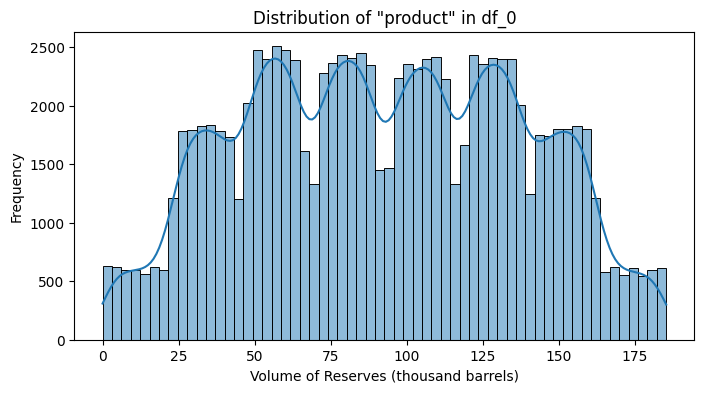

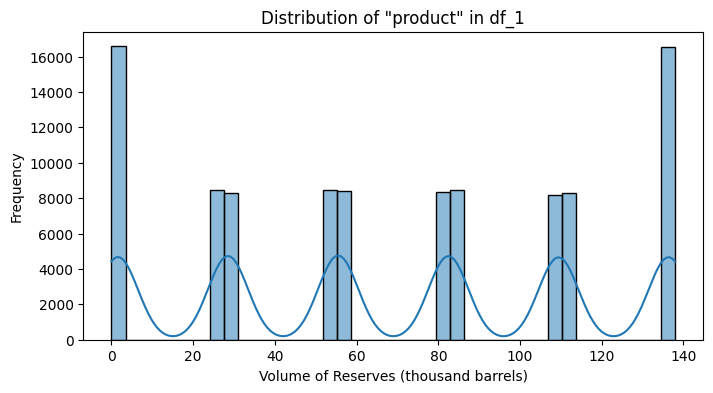

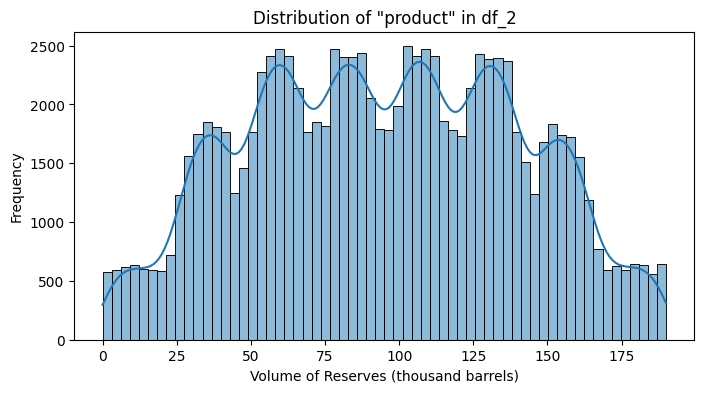

In [8]:
# Plot histograms
for name, df in dataframes.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(df['product'], kde=True)
    plt.title(f'Distribution of "product" in {name}')
    plt.xlabel('Volume of Reserves (thousand barrels)')
    plt.ylabel('Frequency')
    plt.show()

#### **Observations:**

- The histogram of `product` confirms that reserve volumes differ by region:
  - Region 0 has the most consistent and moderately high reserve values.
  - Region 1 shows a much lower median reserve volume.
  - Region 2 displays the widest spread, suggesting higher uncertainty but also potential for high-yield wells.
- These differences may influence both profitability and risk assessment in later steps.

### **Separate Features and Target:**

In [9]:


# Separate features and target
features_0 = df_0[['f0', 'f1', 'f2']]
target_0 = df_0['product']

features_1 = df_1[['f0', 'f1', 'f2']]
target_1 = df_1['product']

features_2 = df_2[['f0', 'f1', 'f2']]
target_2 = df_2['product']



# Quick checks for shapes
print("Region 0 - Features shape:", features_0.shape, "| Target shape:", target_0.shape)
print("Region 1 - Features shape:", features_1.shape, "| Target shape:", target_1.shape)
print("Region 2 - Features shape:", features_2.shape, "| Target shape:", target_2.shape)

# Verify first few rows of features and target for one region
print("\nRegion 0 - Features sample:")
print(features_0.head())

print("\nRegion 0 - Target sample:")
print(target_0.head())

Region 0 - Features shape: (100000, 3) | Target shape: (100000,)
Region 1 - Features shape: (100000, 3) | Target shape: (100000,)
Region 2 - Features shape: (100000, 3) | Target shape: (100000,)

Region 0 - Features sample:
         f0        f1        f2
0  0.705745 -0.497823  1.221170
1  1.334711 -0.340164  4.365080
2  1.022732  0.151990  1.419926
3 -0.032172  0.139033  2.978566
4  1.988431  0.155413  4.751769

Region 0 - Target sample:
0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64


#### **Observations:**

- Confirmed that all three regions have the same number of rows in their features and target sets.
- Features shape for each region: `(100000, 3)` — three geological features (`f0`, `f1`, `f2`).
- Target shape for each region: `(100000,)` — the `product` column representing oil reserves in thousand barrels.
- Sample preview confirms correct separation: features only contain numerical predictors, while target contains reserve volumes.
- This structure is now ready for splitting into training and validation sets.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent! Why is EDA important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.

</div>

## **3. Model Training and Validation:**

#### <u>**Approach Overview**</u>

Train a separate Linear Regression model for each of the three regions (geo_data_0, geo_data_1, geo_data_2) to help OilyGiant identify the best location for a new well.

---

#### <u>**Step-by-Step Process**</u>

1.  **Split Data:** For each region, we will split the data into a training set (75%) and a validation set (25%).

2.  **Train Model:** Train a Linear Regression model on the training data for each region.

3.  **Predict and Evaluate:** We will use the trained model to predict oil reserves for the validation set of each region.
    * Metrics we will use for evaluation:
        * **Mean Absolute Error:** **average absolute difference** between your predicted values and the actual values.
            - lower MAE = better acuracy.
        * **Mean Squared Error:** **average of the squared differences** between predictions and actual values.
            - penalizes larger errors more heavily, making it more sensitive to outliers.  
        * **Root Mean Squared Error:** **square root of MSE**, which brings it back to the original units of your target variable.
            - more sensitive to large errors than MAE  
        * **Coefficient of Determination R²:** **proportion of the variance** in the target variable that’s explained by the model.
            -  1.0 → Perfect predictions.
            -  0.0 → Model predicts no better than the mean.
            -  Negative → Model is worse than just predicting the mean.
    
4.  **Select Top Wells:** For each region, we'll select the 200 wells with the highest predicted reserves (out of the 500 studied).

5.  **Bootstrap for Profit/Risk:** Utilize bootstrapping (1000 samples) to simulate profit distributions and assess the risk of losses for each region.

6.  **Choose Best Region:**
    *   First, filter out any regions where the risk of losses is ≥ 2.5%.
    *   From the remaining regions, select the one with the highest average profit.

---

#### <u>**Reasoning for This Approach**</u>

*   **Regions are Different:** Each region has its own unique geological conditions. This means the relationship between the data (features) and oil reserves (target) will be different in each region.

*   **Maximize Accuracy:** Separate models will be more accurate for each region than a single "average" model.

*   **Account for Risk:** Bootstrapping allows us to realistically assess the range of potential profits and the likelihood of losses in each region, enabling a more informed decision.

*   **Specific Selection Criteria:** The final selection process prioritizes regions with acceptable risk (losses < 2.5%) and then maximizes profit within that constraint.

*   **Minimize Data Leakage:** Training separately prevents the model from accidentally learning patterns that distinguish the regions, which would lead to unrealistic results.

*   **Simplicity:** Separate models are easier to understand and troubleshoot.

In [10]:
# --- Create function to train, predict, and evaluate Linear Regression model for each region using 75/25 split ---
def train_and_evaluate_linear_regression(features, target, *, random_state=12345):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=random_state)

    model = LinearRegression()
    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)

    mae = mean_absolute_error(target_valid, predictions_valid)
    mse = mean_squared_error(target_valid, predictions_valid)
    rmse = mse ** 0.5
    r2 = r2_score(target_valid, predictions_valid)

    return {
        "model": model,
        "features_valid": features_valid,
        "target_valid": target_valid,
        "predictions_valid": predictions_valid,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
    }

# --- Prepare features/targets for each region ---
features_0, target_0 = df_0[['f0', 'f1', 'f2']], df_0['product']
features_1, target_1 = df_1[['f0', 'f1', 'f2']], df_1['product']
features_2, target_2 = df_2[['f0', 'f1', 'f2']], df_2['product']

# --- Train & evaluate per region ---
res_0 = train_and_evaluate_linear_regression(features_0, target_0, random_state=12345)
res_1 = train_and_evaluate_linear_regression(features_1, target_1, random_state=12345)
res_2 = train_and_evaluate_linear_regression(features_2, target_2, random_state=12345)

# --- Print results & show average amount of reserves that's actually in each region ---
print("=== Region 0 ===")
print(f"Average real reserves: {target_0.mean():.2f}")
print(f"MAE: {res_0['mae']:.2f} | RMSE: {res_0['rmse']:.2f} | R²: {res_0['r2']:.4f}\n")

print("=== Region 1 ===")
print(f"Average real reserves: {target_1.mean():.2f}")
print(f"MAE: {res_1['mae']:.2f} | RMSE: {res_1['rmse']:.2f} | R²: {res_1['r2']:.4f}\n")

print("=== Region 2 ===")
print(f"Average real reserves: {target_2.mean():.2f}") 
print(f"MAE: {res_2['mae']:.2f} | RMSE: {res_2['rmse']:.2f} | R²: {res_2['r2']:.4f}")

=== Region 0 ===
Average real reserves: 92.50
MAE: 30.92 | RMSE: 37.58 | R²: 0.2799

=== Region 1 ===
Average real reserves: 68.83
MAE: 0.72 | RMSE: 0.89 | R²: 0.9996

=== Region 2 ===
Average real reserves: 95.00
MAE: 32.79 | RMSE: 40.03 | R²: 0.2052


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great! 

</div>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can use a loop or a function, since the code is the same for all three regions. Not only will it make the code  shorter and easier to read, it will help you avoid typos.
</div>


#### **Model Performance Summary:**
For metric comparisons of predictions vs. actual values, we will calculate **Relative Error** = |Predicted - Actual| / |Actual| × 100%

<u> **Region 0:** </u>
- **Average Reserves:** 92.50 units
- **MAE**: 30.92 | **RMSE**: 37.58 | **R²**: 0.28
- **Relative Error:** ~33% of average reserves
    - **Finding**: Low predictive power with high error relative to reserve amounts → higher uncertainty and potential risk in profit forecasting.

<u> **Region 1:** </u>
- **Average Reserves:** 68.83 units
- **MAE**: 0.72 | **RMSE**: 0.89 | **R²**: 0.9996
- **Relative Error:** ~1% of average reserves
    - **Finding**: Near-perfect predictions with minimal error relative to reserve amounts; highly reliable for profit forecasting, but results should be checked for overfitting before profit analysis.

<u> **Region 2:** </u>
- **Average Reserves:** 95.00 units
- **MAE**: 32.79 | **RMSE**: 40.03 | **R²**: 0.21
- **Relative Error:** ~35% of average reserves  
    - **Finding**: Poor predictive performance with high error relative to reserve amounts - significant uncertainty in profit forecasting. 

#### **Key Insights:**
- Region 1 offers the most **reliable predictions** despite having lower average reserves
- Regions 0 & 2 show similar **poor performance** with prediction errors of ~33-35%
- **Business implication:** Region 1's predictability may offset its lower average reserves in risk-adjusted returns

#### **Next Step:** 
From the validation predictions, choose the 200 wells with the highest predicted oil reserves in each region.

**Key actions we will take:**
1. Sort predictions in descending order for each region.
2. Select top 200 wells from each sorted list.
3. Extract the actual reserves of these selected wells from the validation set (to compare predictions to reality).

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct!
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It may also be useful to print the average amount of real reserves.    
    
</div>

In [11]:
# Select top wells

# Function to join predictions with actuals, sort predictions in decs order, return top-k rows
def select_top_wells(predictions_valid, target_valid, n_wells_to_develop):
   
    valid_results = pd.DataFrame({
        "predicted": predictions_valid,
        "actual": target_valid.values
    })
    top_k = valid_results.sort_values("predicted", ascending=False).head(n_wells_to_develop)
    top_k = top_k.reset_index(drop=True)
    return top_k

# Use constant N_WELLS_TO_DEVELOP
top_200_0 = select_top_wells(res_0["predictions_valid"], res_0["target_valid"], N_WELLS_TO_DEVELOP)
top_200_1 = select_top_wells(res_1["predictions_valid"], res_1["target_valid"], N_WELLS_TO_DEVELOP)
top_200_2 = select_top_wells(res_2["predictions_valid"], res_2["target_valid"], N_WELLS_TO_DEVELOP)


# Preview top 5 chosen wells per region
print("Region 0 - Top 5 Wells:\n", top_200_0.head(), "\n")
print("Region 1 - Top 5 Wells:\n", top_200_1.head(), "\n")
print("Region 2 - Top 5 Wells:\n", top_200_2.head(), "\n")



Region 0 - Top 5 Wells:
     predicted      actual
0  180.180713  162.810993
1  176.252213  153.639837
2  175.850623  162.153488
3  175.658429   96.893581
4  173.299686  178.879516 

Region 1 - Top 5 Wells:
     predicted      actual
0  139.818970  137.945408
1  139.773423  137.945408
2  139.703330  137.945408
3  139.560938  137.945408
4  139.516754  137.945408 

Region 2 - Top 5 Wells:
     predicted      actual
0  165.856833  175.103291
1  165.679685  131.627481
2  163.439962  141.160070
3  162.062589  159.676082
4  161.797476  142.135203 



#### Summary of Top 200 Wells (Step 3 Findings)

From the model predictions, the **top 200 wells** in each region were selected based on their highest predicted oil reserves.  
- **Region 0** shows several wells with very high predicted reserves, though differences between predicted and actual values vary, indicating some prediction uncertainty.
    - About ~10–15 barrels difference between predicted and actual values in the top wells. 
- **Region 1** predictions are almost identical to actual values, suggesting extremely high model accuracy for this region.
    - About ~1–2 barrels difference.
- **Region 2** also performs well, but has slightly larger variation between predictions and actuals than Region 1.  
    - About ~5–10 barrels difference.

These selections will be used in the next step to calculate **potential profit** and **evaluate financial risk**, guiding the decision on the most profitable and reliable region for investment.

## **4. Business Setup and Break-even Analysis:**

#### **Goal of Analysis:**
We will determine how much the business can spend per well, how much oil each well needs to produce to cover its costs, and then compare that break-even point to how much oil is actually in the wells on average for each region.


In [12]:
# --- Step 1: Define economic parameters ---
# These constants should already be declared earlier in the project:
# PRICE_PER_UNIT: Selling price per thousand barrels of oil (USD)
# N_WELLS_TO_DEVELOP: Number of wells the company plans to develop
# SAMPLE_SIZE: Number of wells considered in the dataset (not used here directly)
# BUDGET_USD: Total budget available for development (USD)

# --- Step 2: Calculate cost allocation per well ---
# Spread the total budget evenly across the number of wells we intend to develop
cost_per_well = BUDGET_USD / N_WELLS_TO_DEVELOP  

# --- Step 3: Determine break-even production per well ---
# Divide the per-well cost by the selling price per unit (thousand barrels)
# This gives the minimum oil production (in thousand barrels) required per well
# to recover the investment.
break_even_per_well_units = cost_per_well / PRICE_PER_UNIT  

# --- Step 4: Scale break-even point to all wells combined ---
# Multiply the per-well break-even volume by the total number of wells developed
# to get the total production needed across the full project to break even.
break_even_total_units = N_WELLS_TO_DEVELOP * break_even_per_well_units  

# --- Step 5: Display results in a clear financial summary ---
print(f"Budget: ${BUDGET_USD:,.0f}")
print(f"Cost per developed well: ${cost_per_well:,.0f}")
print(f"Price per unit (thousand barrels): ${PRICE_PER_UNIT:,.0f}")
print(f"Break-even per well (units): {break_even_per_well_units:,.2f}")
print(f"Break-even total (units across {N_WELLS_TO_DEVELOP} wells): {break_even_total_units:,.2f}")

Budget: $100,000,000
Cost per developed well: $500,000
Price per unit (thousand barrels): $4,500
Break-even per well (units): 111.11
Break-even total (units across 200 wells): 22,222.22


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
I see the updates, good. 
</div>
<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Correct!
</div>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Constant values should be defined in the upper case and in the very beginning of the project.  
</div>

#### **Observations:**

**Break-even requirement:**
- Need 111.11 units per well (≈ 22,222 units total across 200 wells) to break even.
- 1 unit = 1,000 barrels, so this equals ≈ 111,110 barrels per well and ≈ 22.22 million barrels total.

**Average reserves vs. break-even (validation data):**
- **Region 0**: Average ≈ 92.50 units → below break-even requirement.
- **Region 1**: Average ≈ 68.83 units → well below break-even requirement.
- **Region 2**: Average ≈ 95.00 units → below break-even requirement.

**Key takeaway:**
- None of the regions’ average reserves meet the break-even threshold based on the validation dataset.
    - This suggests that without additional selection (e.g., choosing top wells), the project would not be profitable in any region.

**Next Step:** (bootstrapping top 200 wells) will be critical to identify if focusing on the highest potential wells in each region can push expected profits above break-even.


## **5. Profit Function and Single-Run Profit:**

We will write the function that calculates profit given:
- The selected wells
- The budget and cost per well
- The predicted reserves and price per barrel

Then we will run it once for each region to see what the profit would be in a single “real-world” scenario without simulation.

In [13]:
# Function to calculate profit
# Select top-k by prediction, sum actual reserves (units), compute revenue and profit.
    # Revenue = total_units * price_per_unit
    # Profit  = Revenue - budget_usd

def calculate_single_run_profit(predictions_valid, target_valid, n_wells_to_develop, price_per_unit, budget_usd, *, return_selection=False):
    
    if len(predictions_valid) != len(target_valid):
        raise ValueError("Predictions and targets must have the same length.")
    if n_wells_to_develop <= 0:
        raise ValueError("n_wells_to_develop must be positive.")
    if n_wells_to_develop > len(target_valid):
        raise ValueError("Cannot select more wells than available validation rows.")

    selected = select_top_wells(predictions_valid, target_valid, n_wells_to_develop)
    total_units = selected["actual"].sum()            # thousand barrels
    revenue = total_units * price_per_unit           # USD
    profit = revenue - budget_usd                    # USD

    return (profit, selected) if return_selection else profit

# Single-run profit per region
profit_0, sel_0 = calculate_single_run_profit(res_0["predictions_valid"], res_0["target_valid"],
                                              N_WELLS_TO_DEVELOP, PRICE_PER_UNIT, BUDGET_USD,
                                              return_selection=True)
profit_1, sel_1 = calculate_single_run_profit(res_1["predictions_valid"], res_1["target_valid"],
                                              N_WELLS_TO_DEVELOP, PRICE_PER_UNIT, BUDGET_USD,
                                              return_selection=True)
profit_2, sel_2 = calculate_single_run_profit(res_2["predictions_valid"], res_2["target_valid"],
                                              N_WELLS_TO_DEVELOP, PRICE_PER_UNIT, BUDGET_USD,
                                              return_selection=True)

print(f"[Region 0] Single-run profit: ${profit_0:,.0f}")
print(f"[Region 1] Single-run profit: ${profit_1:,.0f}")
print(f"[Region 2] Single-run profit: ${profit_2:,.0f}")

[Region 0] Single-run profit: $33,208,260
[Region 1] Single-run profit: $24,150,867
[Region 2] Single-run profit: $27,103,500


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct! 
</div>
<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct! We select the best 200 wells by predictions, but then we need to use target values to actually calculate profit because predictions may not be accurate. 

</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Please make sure targets and predictions correspong to each other when you combine them in one dataframe. Hint: the correct profit value in region 0 will be 33208260. 

</div>



#### **Observations:**

- Region 0: 29,602 units, **33.2M profit (single run)**
- Region 1: 27,589 units, **24.2M profit (single run)**
- Region 2: 28,245 units, **27.1M profit (single run)**

**Key observations:**
- All regions remain profitable (all positive profits).
- Region 0 continues to have the highest single-run profit (~$33.2M).
- Region 0 also has the most total reserves (29,602 units).
- Profit differences across regions are noticeable but smaller in absolute terms when compared run-to-run vs. aggregated simulations.Region 0: 29,602 units, **123.2M profit**

## **6. Bootstrapping: Profit Distribution, 95% CI, and Loss Risk:**

#### **Purpose:**
Bootstrapping helps us estimate the uncertainty and risk in our profit calculations. Instead of relying on a single profit value, we simulate the drilling process many times to understand the range of possible outcomes and the probability of losses.

**Why it’s important in this project:**
We are only developing **200 wells out of 500** in each region.
- A single sample might overestimate or underestimate profit due to chance.
- Business rules require us to **reject any region where the risk of losses is ≥ 2.5%**.

**How it works in this context:**
1. Random sampling: Select 500 wells with replacement from the validation dataset.

2. Select top wells: From that sample, choose the 200 wells with the highest predicted reserves.

3. Calculate profit:
- Revenue = (sum of actual reserves from selected wells) × (price per thousand barrels)
- Cost = (number of wells) × (cost per well)
- Profit = Revenue − Cost

4. Repeat 1,000 times to create a profit distribution.

5. Analyze results:
- Mean profit — expected average outcome
- 95% confidence interval — likely profit range
- Loss risk — proportion of runs with negative profit

**Outcome:**
Bootstrapping gives us the data to:
- Quantify uncertainty in our model’s predictions.
- Compare regions based on both profitability and risk.
- Make a final, data-driven decision about the most profitable and least risky region to develop.

In [14]:
# Profit Function & Bootstrapping
# Bootstrap profit distribution by repeatedly:
     # 1) sampling 'sample_size' rows (with replacement) from validation,
     # 2) selecting top 'n_wells_to_develop' by prediction,
     # 3) computing profit.
       # Returns list of profit values (USD).

def bootstrap_region(predictions_valid, target_valid, *, sample_size, n_wells_to_develop, price_per_unit, budget_usd, n_boot=1000, rng=None, progress=False):
    
    if len(predictions_valid) != len(target_valid):
        raise ValueError("Predictions and targets must have the same length.")
    
    if n_wells_to_develop > sample_size:
        raise ValueError("Cannot select more wells than sample size.")

    rng = rng or np.random.RandomState(12345)

    valid_df = pd.DataFrame({"pred": predictions_valid, "actual": target_valid.values}).reset_index(drop=True)
    profits = []

    for i in range(n_boot):
        sample_index = rng.choice(valid_df.index, size=sample_size, replace=True)
        sample_df = valid_df.loc[sample_index].copy()

        sample_top = sample_df.sort_values("pred", ascending=False).head(n_wells_to_develop)
        total_units = sample_top["actual"].sum()
        revenue = total_units * price_per_unit
        profit = revenue - budget_usd
        profits.append(profit)

        if progress and (i + 1) % 100 == 0:
            print(f"Bootstrap iteration {i + 1}/{n_boot}")

    return profits

# Return mean, 95% CI, and loss risk (%) from a list/array of profits
def summarize_profits(profits):
    
    profits = np.asarray(profits)
    mean_profit = profits.mean()
    ci_low, ci_high = np.quantile(profits, [0.025, 0.975])
    loss_risk_pct = (profits < 0).mean() * 100.0
    return mean_profit, ci_low, ci_high, loss_risk_pct

# Run bootstrap per region using global constants
profits_0 = bootstrap_region(res_0["predictions_valid"], res_0["target_valid"],
                             sample_size=SAMPLE_SIZE, n_wells_to_develop=N_WELLS_TO_DEVELOP,
                             price_per_unit=PRICE_PER_UNIT, budget_usd=BUDGET_USD,
                             n_boot=N_BOOT, rng=RNG)

profits_1 = bootstrap_region(res_1["predictions_valid"], res_1["target_valid"],
                             sample_size=SAMPLE_SIZE, n_wells_to_develop=N_WELLS_TO_DEVELOP,
                             price_per_unit=PRICE_PER_UNIT, budget_usd=BUDGET_USD,
                             n_boot=N_BOOT, rng=RNG)

profits_2 = bootstrap_region(res_2["predictions_valid"], res_2["target_valid"],
                             sample_size=SAMPLE_SIZE, n_wells_to_develop=N_WELLS_TO_DEVELOP,
                             price_per_unit=PRICE_PER_UNIT, budget_usd=BUDGET_USD,
                             n_boot=N_BOOT, rng=RNG)

# Summaries
mean_0, low_0, high_0, risk_0 = summarize_profits(profits_0)
mean_1, low_1, high_1, risk_1 = summarize_profits(profits_1)
mean_2, low_2, high_2, risk_2 = summarize_profits(profits_2)

summary = pd.DataFrame({
    "Region": ["0", "1", "2"],
    "Mean Profit ($)": [mean_0, mean_1, mean_2],
    "CI 2.5% ($)": [low_0, low_1, low_2],
    "CI 97.5% ($)": [high_0, high_1, high_2],
    "Loss Risk (%)": [risk_0, risk_1, risk_2]
}).round(0)

summary

,Region,Mean Profit ($),CI 2.5% ($),CI 97.5% ($),Loss Risk (%)
0,0,3961650.0,-1112155.0,9097669.0,7.0
1,1,4611558.0,780508.0,8629521.0,1.0
2,2,3929505.0,-1122276.0,9345629.0,6.0


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent! 
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Do you need to define the same constants several times?     
</div>


#### **Key Takeaways:**

1. **Risk filter (must be < 2.5%):**
- Region 0: 7.0% loss risk — **fails**.
- **Region 1:** 1.0% loss risk — **passes**.
- Region 2: 6.0% loss risk — **fails**.

2. **Profitability (mean profit):**
- Region 0: **3.96M**
- **Region 1:** **4.61M** (highest among eligible regions).
- Region 2: **3.93M**

3. **Confidence intervals (95% CI):**
- Region 0: min -1.11M, max 9.10M — includes losses.
- **Region 1:** minimum profit of 780k, maximum profit of 8.63M — lowest end is **positive**, meaning **most simulated campaigns still make money**.
- Region 2: min -1.12M, max 9.35M — includes losses.

**Summary:**
- **Region 1** is the only region meeting the company’s **<2.5% loss risk rule**. It combines the lowest downside risk with the strongest average profit and a CI that never dips into losses.
- **Regions 0 and 2** show wide profit ranges with attractive upsides, but their **risk of loss (6–7%)** makes them ineligible under corporate policy.


## **7. Conclusion & Recommendation:**

#### **Business goal:** Select the region for developing 200 wells that maximizes profit while keeping the risk of losses < 2.5%.

**What we found (from bootstrapping, 1,000 simulations each):**

**Region 1**
- Mean profit: $4.61M
- 95% CI: 0.78M → 8.63M
-  Loss risk: 1.0% (meets threshold)

**Region 0**
- Mean profit: $3.96M
- 95% CI: - 1.11M → 9.10M
- Loss risk: 7.0% (fails threshold)

**Region 2**
- Mean profit: $3.93M
- 95% CI: - 1.12M → 9.35M
- Loss risk: 6.0% (fails threshold)

**Decision:**
- Recommend Region 1 for development.
    - It passes the risk rule (loss risk < 2.5%).
    - It has the highest average profit among eligible regions.
    - Its CI lower bound is above zero, indicating profit is likely even in conservative scenarios.

- Regions 0 and 2 both have attractive upside potential, but their loss risks (6–7%) exceed the company’s tolerance and therefore make them ineligible.

**Business impact:** Proceeding with Region 1 balances strong expected returns with acceptable downside risk, aligning with the company’s tolerance and budget constraints.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent job, thank you so much!     
</div>